In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
from typing import Iterable
import pickle

In [8]:
file_path = "../data/dataset_disruption_characterization.pickle"
if os.path.exists(file_path):
    with open(file_path, "rb") as f:
        dataset = pickle.load(f)
else:
    print("File not found.")

data_raw_path = "../data/DISR_data"
def load_raw_signal(shot):
    return pd.read_parquet(os.path.join(data_raw_path, f"JET_DATAno{shot}.parquet"))

In [9]:
def walk(struct, prefix="", append="  "):
    # simple function to inspect dict without printing all contents
    for key, item in struct.items():
        if not isinstance(item, dict):
            if isinstance(item, np.ndarray):
                postfix = f"{item.shape}"
            elif isinstance(item, Iterable):
                postfix = f"({len(item)})"
            else:
                postfix = ""

            print(f"{prefix}{key}: var <{type(item).__name__}> {postfix}")
        else:
            print(f"{prefix}{key}\n{prefix}" + "{")
            walk(item, prefix=prefix+append, append=append)
            print(f"{prefix}" + "}")

In [10]:
# get all shot nos
all_shots = [int(os.path.basename(x.split(".parquet")[0].split("JET_DATAno")[1]))
             for x in glob.glob(os.path.join(data_raw_path, f"JET_DATAno*.parquet"))]
if len(all_shots) < 156:  # check if all data is there
    raise ValueError(f"Not all shots found in path /{data_raw_path}/; found only {len(all_shots)} out of 156")

## Create dataset

In [11]:
shots = []
for i in range(len(dataset)):
    shots.append(dataset[i]['metadata']['shot'])

print("Shots in dataset:")
print(len(np.unique(shots)))

Shots in dataset:
137


In [12]:
dataset[0]["x"]["columns"]

['IPLA', 'IPref', 'ECEcore', 'SSXcore', 'LI', 'Q95', 'ZMAG', 'Vloop']

In [13]:
df_data = pd.DataFrame()

# Loop through each entry in the dataset
for i, entry in enumerate(dataset):
    # Extract data and label from the current entry
    d = entry['x']
    label = entry['y']

    # Create a DataFrame for the current entry
    df = pd.DataFrame(d['data'], columns=d['columns'])   
    df['Frame'] = range(0, 20)
    df['Label'] = label
    df['Time'] = d['time']
    df["Distance"] = df["IPLA"] - df["IPref"]
    df['Shot'] = entry['metadata']['shot']

    # Append the current DataFrame to the main DataFrame
    df_data = pd.concat([df_data, df], ignore_index=True)


df_data = df_data.dropna()
#display every row
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#display(df_data)

In [14]:
df_data.head(21)

,IPLA,IPref,ECEcore,SSXcore,LI,Q95,ZMAG,Vloop,Frame,Label,Time,Distance,Shot
0,1989456.750,1999500.0,1740.929077,0.008850,1.191489,3.874169,0.303880,-0.519496,0,0,10.361,-10043.250,81206
1,1989606.250,1999500.0,1744.737427,0.008850,1.191489,3.874169,0.303880,-0.758418,1,0,10.362,-9893.750,81206
2,1988484.000,1999500.0,1756.823730,0.008698,1.191489,3.874169,0.303880,-1.037327,2,0,10.363,-11016.000,81206
3,1989329.625,1999500.0,1756.823730,0.008469,1.191489,3.874169,0.303880,-0.758418,3,0,10.364,-10170.375,81206
4,1990532.250,1999500.0,1746.057251,0.008850,1.191489,3.874169,0.303880,0.237256,4,0,10.365,-8967.750,81206
5,1988951.375,1999500.0,1755.573242,0.008774,1.191489,3.874169,0.303880,-1.396209,5,0,10.366,-10548.625,81206
6,1989445.625,1999500.0,1755.573242,0.008469,1.191489,3.874169,0.303880,-0.639124,6,0,10.367,-10054.375,81206
7,1990167.375,1999500.0,1761.411133,0.008850,1.191489,3.874169,0.303880,-0.400202,7,0,10.368,-9332.625,81206
8,1989791.500,1999500.0,1763.725098,0.008926,1.191489,3.874169,0.303880,-0.798405,8,0,10.369,-9708.500,81206
9,1990491.875,1999500.0,1765.569336,0.008774,1.191489,3.874169,0.303880,-1.197274,9,0,10.370,-9008.125,81206


In [15]:
#count how many different shots are in df_data
df_data["Shot"].nunique()

136

In [16]:
df_data_raw = df_data.copy()

### Minor event counting

In [11]:
#make a for loop per shot
shots = df_data['Shot'].unique()
#add a column to the dataframe called order
df_data['Order'] = 0
for shot in shots :
    #take frame 0
    df_shot = df_data[df_data['Shot'] == shot]
    df_shot = df_shot[df_shot['Frame'] == 0]
    #take the time of the frame 0
    time = df_shot['Time'].values

    for l in range (len(time)):
        #take the index in the data of the smallest time
        index = df_shot['Time'].idxmin()
        #set the order column of the index to 1
        df_data.loc[index, 'Order'] = l
        #set the order to the next 18 rows
        for i in range(1, 20):
            df_data.loc[index+i, 'Order'] = l
        #drop the value of the time array so the next smallest value will be taken
        df_shot = df_shot.drop(index)

def process_shot_group(group):
    minor_event_tracker = 0
    minor_events = []
    #sort by order column
    group = group.sort_values(by=['Order'])

    for i in group.index[::20]:  # Iterate over the index, stepping by 20
        minor_events.extend([minor_event_tracker] * 20)


        if group.at[i, 'Label'] == 1:  # Check the label at every 20th row
            minor_event_tracker += 1
        elif group.at[i, 'Label'] == 2:
            minor_event_tracker +=5

    group['Minor events that occurred yet'] = minor_events
    return group

# Apply the function to each 'Shot' group
grouped_df = df_data.groupby('Shot').apply(process_shot_group).reset_index(drop=True)
# Display the result
grouped_df = grouped_df.groupby(by=['Shot', 'Order'], group_keys=False).apply(lambda x: x.sort_values(by=['Frame'])).reset_index(drop=True)

grouped_df['Label'] = grouped_df['Label'].astype(float)
grouped_df[6560:6600]
df_data = grouped_df


In [12]:
#take the first 20 rows
df_data_sliced = df_data.iloc[0:20]
df_data_sliced = df_data_sliced.iloc[5:20]

### For loop to get parameters per window per group

In [13]:
#get the distance from the each row
#create a dictionnary with a distance column
dict_windows = {'distances' :[],'distance_mean':[],'minor_events':[],'instability_x_current' :[],'ECEcore' :[],'ECEcore_mean':[],'ECEcore_dx1':[],'ECEcore_dx2':[], 'ZMAG':[],'ZMAG_mean' :[],'LI' :[], 'LI_mean' :[],'IPLA' :[], 'shot':[], 'label':[],'window' :[], 'IPLA_dx1' :[], 'IPLA_dx2' : [], 'IPLA_dx3' :[], 'IPLA_ddx' : [], 'fft_low': [],'IPLA_1' : [], 'IPLA_2' : [], 'IPLA_3' :[], 'IPLA_4' : [],'IPLA_mean':[],'time_window' : [], 'Vloop_1' : [],'Vloop_2' : [], 'Vloop_3' :[], 'Vloop_4' :[]}

df_data_group = df_data.groupby('Label')
#df_data_group_0 = df_data_group.get_group(0)

distances = []
IPLA = []
derivative_1 = []
derivative_2 = []
derivative_3 = []
double_derivatives = []
window_counter = 0
fft_results = []
fs = 1000  # Sampling frequency in Hz
dt = 1/fs  # Time step in seconds

for j in range(3):

    distances_j = []
    distances_mean_j = []

    IPLA_j = []
    IPLA_1_j = []
    IPLA_2_j = []
    IPLA_3_j = []
    IPLA_4_j = []
    IPLA_mean_j = []

    Vloop_1_j = []
    Vloop_2_j = []
    Vloop_3_j = []
    Vloop_4_j = []

    ECEcore_j = []
    ECEcore_mean_j = []
    ECEcore_dx1_j = []
    ECEcore_dx2_j = []

    ZMAG_j = []
    ZMAG_mean_j = []

    LI_j = []
    LI_mean_j = []

    minor_events_j = []
    instabilities_x_current_j = []

    fft_results_j = []

    derivative_1_j= []
    derivative_2_j = []
    derivative_3_j = []
    IPLA_ddxs_j = []

    shots_j = []

    window_j =[]
    time_window_j = []

    df_data_group_j = df_data_group.get_group(j)

    for i in range(0,df_data_group_j.shape[0],20):

        #take the first 20 rows
        df_data_sliced = df_data_group_j.iloc[i:i+20]
        df_data_sliced = df_data_sliced.iloc[5:20]

        df_data_distance = df_data_sliced['Distance']
        df_data_distance = df_data_distance.to_numpy().astype(np.float64)

        df_data_current = df_data_sliced['IPLA']
        df_data_current = df_data_current.to_numpy()

        #get the distance from the each row
        distances_j.append(df_data_distance)
        distances_mean_j.append(np.mean(df_data_distance))

        IPLA_j.append(df_data_current)
        #A CHANGER POUR LES VRAIES WINDOWS
        IPLA_1_j.append(df_data_current[14])
        IPLA_2_j.append(df_data_current[6])
        IPLA_3_j.append(df_data_current[7])
        IPLA_4_j.append(df_data_current[5])
        IPLA_mean_j.append(np.mean(df_data_current))


        df_mean = np.mean(df_data_distance)

        #take the fft of the current
        fft_res = np.fft.fft(df_data_current)
        fft_res = np.abs(np.array(fft_res))
        fft_results_j.append(fft_res[0])
        
        df_data_ECEcore = df_data_sliced['ECEcore'].to_numpy()
        ECEcore_j.append(df_data_ECEcore)
        ECEcore_mean_j.append(np.mean(df_data_ECEcore))


        df_data_ece_derivative = np.diff(df_data_ECEcore)[-2:]

        ECEcore_dx1_j.append(df_data_ece_derivative[0])
        ECEcore_dx2_j.append(df_data_ece_derivative[1])

        df_data_ZMAG = df_data_sliced['ZMAG'].to_numpy()
        ZMAG_j.append(df_data_ZMAG)
        ZMAG_mean_j.append(np.mean(df_data_ZMAG))

        minor_events_j.append(np.mean(df_data_sliced['Minor events that occurred yet'].to_numpy()))
        instabilities_x_current_j.append(np.mean(minor_events_j[-1]*df_data_current))

        df_data_LI = df_data_sliced['LI'].to_numpy()
        LI_j.append(df_data_LI)
        LI_mean_j.append(np.mean(df_data_LI))


        Vloop_1_j.append(df_data_sliced['Vloop'].to_numpy()[14])
        Vloop_2_j.append((df_data_sliced['Vloop'].to_numpy()[13]+df_data_sliced['Vloop'].to_numpy()[11]+df_data_sliced['Vloop'].to_numpy()[10])/3)
        Vloop_3_j.append((df_data_sliced['Vloop'].to_numpy()[5]+df_data_sliced['Vloop'].to_numpy()[6]+df_data_sliced['Vloop'].to_numpy()[7]+df_data_sliced['Vloop'].to_numpy()[8])/4)
        Vloop_4_j.append(df_data_sliced['Vloop'].to_numpy()[2])




        #take the derivative of the distance
        df_data_derivative = np.diff(df_data_current)[-3:]
        derivative_1_j.append(df_data_derivative[0])
        derivative_2_j.append(df_data_derivative[1])
        derivative_3_j.append(df_data_derivative[2])


        #take the double derivative of the distance
        df_data_IPLA_ddx = np.diff(df_data_derivative)[-1:]
        IPLA_ddxs_j.append(df_data_IPLA_ddx)

        #take the shot number
        df_data_shot = df_data_sliced['Shot']
        df_data_shot = df_data_shot.to_numpy()
        shots_j.append(df_data_shot[0])

        window_counter += 1
        window_j.append(window_counter)
        time_window_j.append(df_data_sliced['Time'].to_numpy()[0])


    distances_j = np.array(distances_j)
    distances.append(distances_j)

    fft_results_j = np.array(fft_results_j)
    fft_results.append(fft_results_j)

    IPLA_j = np.array(IPLA_j)
    IPLA.append(IPLA_j)

    derivative_1_j = np.array(derivative_1_j)
    derivative_1.append(derivative_1_j)

    derivative_2_j = np.array(derivative_2_j)
    derivative_2.append(derivative_2_j)

    derivative_3_j = np.array(derivative_3_j)
    derivative_3.append(derivative_3_j)


    #double_derivatives_j = np.array(double_derivatives_j)
    double_derivatives.append(IPLA_ddxs_j)

    dict_windows['distances'].append(distances_j)
    dict_windows['distance_mean'].append(distances_mean_j)

    dict_windows['fft_low'].append(fft_results_j)

    dict_windows['IPLA'].append(IPLA_j)
    dict_windows['IPLA_1'].append(IPLA_1_j)
    dict_windows['IPLA_2'].append(IPLA_2_j)
    dict_windows['IPLA_3'].append(IPLA_3_j)
    dict_windows['IPLA_4'].append(IPLA_4_j)
    dict_windows['IPLA_mean'].append(IPLA_mean_j)

    dict_windows['Vloop_1'].append(Vloop_1_j)
    dict_windows['Vloop_2'].append(Vloop_2_j)
    dict_windows['Vloop_3'].append(Vloop_3_j)
    dict_windows['Vloop_4'].append(Vloop_4_j)

    dict_windows['ECEcore'].append(ECEcore_j)
    dict_windows['ECEcore_mean'].append(ECEcore_mean_j)
    dict_windows['ECEcore_dx1'].append(ECEcore_dx1_j)
    dict_windows['ECEcore_dx2'].append(ECEcore_dx2_j)
    
    dict_windows['ZMAG'].append(ZMAG_j)
    dict_windows['ZMAG_mean'].append(ZMAG_mean_j)

    dict_windows['LI'].append(LI_j)
    dict_windows['LI_mean'].append(LI_mean_j)
    
    dict_windows['minor_events'].append(minor_events_j)
    dict_windows['instability_x_current'].append(instabilities_x_current_j)
    

    dict_windows['shot'].append(shots_j)

    dict_windows['label'].append(j)

    dict_windows['window'].append(window_j)
    dict_windows['time_window'].append(time_window_j)

    dict_windows['IPLA_dx1'].append(derivative_1_j)
    dict_windows['IPLA_dx2'].append(derivative_2_j)
    dict_windows['IPLA_dx3'].append(derivative_3_j)

    dict_windows['IPLA_ddx'].append(IPLA_ddxs_j)

    


### Change dict to df

In [14]:
dict_windows_0 = {'distances' :[],'distance_mean':[],'minor_events':[],'instability_x_current' :[],'ECEcore' :[],'ECEcore_mean':[],'ECEcore_dx1':[],'ECEcore_dx2':[], 'ZMAG':[],'ZMAG_mean' :[],'LI' :[], 'LI_mean':[],'IPLA' :[],'fft_low' :[],'shot':[], 'label':[],'window' :[], 'IPLA_dx1' :[], 'IPLA_dx2' : [], 'IPLA_dx3' :[], 'IPLA_ddx' : [], 'IPLA_1' : [], 'IPLA_2' : [], 'IPLA_3' :[], 'IPLA_4' : [],'IPLA_mean':[], 'time_window' : [],'Vloop_1' : [],'Vloop_2' : [], 'Vloop_3' :[], 'Vloop_4' :[]}
dict_windows_1 = {'distances' :[],'distance_mean':[],'minor_events':[],'instability_x_current' :[],'ECEcore' :[],'ECEcore_mean':[],'ECEcore_dx1':[],'ECEcore_dx2':[], 'ZMAG':[],'ZMAG_mean' :[],'LI' :[],'LI_mean':[],'IPLA' :[],'fft_low' :[], 'shot':[], 'label':[],'window' :[], 'IPLA_dx1' :[], 'IPLA_dx2' : [], 'IPLA_dx3' :[], 'IPLA_ddx' : [], 'IPLA_1' : [], 'IPLA_2' : [], 'IPLA_3' :[], 'IPLA_4' : [], 'IPLA_mean':[],'time_window' : [],'Vloop_1' : [],'Vloop_2' : [], 'Vloop_3' :[], 'Vloop_4' :[]}
dict_windows_2 = {'distances' :[],'distance_mean':[],'minor_events':[],'instability_x_current' :[],'ECEcore' :[],'ECEcore_mean':[],'ECEcore_dx1':[],'ECEcore_dx2':[], 'ZMAG':[],'ZMAG_mean' :[],'LI' :[],'LI_mean':[], 'IPLA' :[],'fft_low' :[],'shot':[], 'label':[],'window' :[], 'IPLA_dx1' :[], 'IPLA_dx2' : [], 'IPLA_dx3' :[], 'IPLA_ddx' : [], 'IPLA_1' : [], 'IPLA_2' : [], 'IPLA_3' :[], 'IPLA_4' : [], 'IPLA_mean':[],'time_window' : [],'Vloop_1' : [],'Vloop_2' : [], 'Vloop_3' :[], 'Vloop_4' :[]}

for i in dict_windows.keys():
    dict_windows_0[i] = dict_windows[i][0]
    dict_windows_1[i] = dict_windows[i][1]
    dict_windows_2[i] = dict_windows[i][2]


#check the shape of the dict
for i in dict_windows_0.keys():
    print(i, np.shape(dict_windows_0[i]))

distances (642, 15)
distance_mean (642,)
minor_events (642,)
instability_x_current (642,)
ECEcore (642, 15)
ECEcore_mean (642,)
ECEcore_dx1 (642,)
ECEcore_dx2 (642,)
ZMAG (642, 15)
ZMAG_mean (642,)
LI (642, 15)
LI_mean (642,)
IPLA (642, 15)
fft_low (642,)
shot (642,)
label ()
window (642,)
IPLA_dx1 (642,)
IPLA_dx2 (642,)
IPLA_dx3 (642,)
IPLA_ddx (642, 1)
IPLA_1 (642,)
IPLA_2 (642,)
IPLA_3 (642,)
IPLA_4 (642,)
IPLA_mean (642,)
time_window (642,)
Vloop_1 (642,)
Vloop_2 (642,)
Vloop_3 (642,)
Vloop_4 (642,)


#### format the arrays for conversion to DF

In [15]:
#extend the label column to match the shape of the other columns
n_0 = dict_windows_0['distances'].shape[0]
dict_windows_0['label'] = np.full(n_0, dict_windows_0['label'])

n_1 = dict_windows_1['distances'].shape[0]
dict_windows_1['label'] = np.full(n_1, dict_windows_1['label'])

n_2 = dict_windows_2['distances'].shape[0]
dict_windows_2['label'] = np.full(n_2, dict_windows_2['label'])

#change distance column and IPLA to a list of arrays so it can be converted to a dataframe
distances = []
IPLA = []
ZMAG =[]
ECEcore = []
LI = []
for i in range(dict_windows_0['distances'].shape[0]):
    distances.append(dict_windows_0['distances'][i])
    IPLA.append(dict_windows_0['IPLA'][i])
    ZMAG.append(dict_windows_0['ZMAG'][i])
    ECEcore.append(dict_windows_0['ECEcore'][i])
    LI.append(dict_windows_0['LI'][i])


dict_windows_0['distances'] = distances
dict_windows_0['IPLA'] = IPLA
dict_windows_0['ZMAG'] = ZMAG
dict_windows_0['ECEcore'] = ECEcore
dict_windows_0['LI'] = LI

distances = []
IPLA = []
ZMAG =[]
ECEcore = []
LI = []
for i in range(dict_windows_1['distances'].shape[0]):
    distances.append(dict_windows_1['distances'][i])
    IPLA.append(dict_windows_1['IPLA'][i])
    ZMAG.append(dict_windows_1['ZMAG'][i])
    ECEcore.append(dict_windows_1['ECEcore'][i])
    LI.append(dict_windows_1['LI'][i])

dict_windows_1['distances'] = distances
dict_windows_1['IPLA'] = IPLA
dict_windows_1['ZMAG'] = ZMAG
dict_windows_1['ECEcore'] = ECEcore
dict_windows_1['LI'] = LI

distances = []
IPLA = []
ZMAG =[]
ECEcore = []
LI = []
for i in range(dict_windows_2['distances'].shape[0]):
    distances.append(dict_windows_2['distances'][i])
    IPLA.append(dict_windows_2['IPLA'][i])
    ZMAG.append(dict_windows_2['ZMAG'][i])
    ECEcore.append(dict_windows_2['ECEcore'][i])
    LI.append(dict_windows_2['LI'][i])

dict_windows_2['distances'] = distances
dict_windows_2['IPLA'] = IPLA
dict_windows_2['ZMAG'] = ZMAG
dict_windows_2['ECEcore'] = ECEcore
dict_windows_2['LI'] = LI


#change double derivative column to a list
double_derivative = []
for i in range(np.shape(dict_windows_0['IPLA_ddx'])[0]):
    double_derivative.append(dict_windows_0['IPLA_ddx'][i][0])
    
dict_windows_0['IPLA_ddx'] = double_derivative

double_derivative = []
for i in range(np.shape(dict_windows_1['IPLA_ddx'])[0]):
    double_derivative.append(dict_windows_1['IPLA_ddx'][i][0])

dict_windows_1['IPLA_ddx'] = double_derivative

double_derivative = []
for i in range(np.shape(dict_windows_2['IPLA_ddx'])[0]):
    double_derivative.append(dict_windows_2['IPLA_ddx'][i][0])

dict_windows_2['IPLA_ddx'] = double_derivative



In [16]:
#dict_windows_0 to dataframe
df_windows_0 = pd.DataFrame.from_dict(dict_windows_0)
df_windows_0.head(21)
#dict_windows_1 to dataframe
df_windows_1 = pd.DataFrame.from_dict(dict_windows_1)
df_windows_1.head(21)
#dict_windows_0 to dataframe
df_windows_2 = pd.DataFrame.from_dict(dict_windows_2)
df_windows_2.head(21)

#concatenate the 3
df_windows = pd.concat([df_windows_0, df_windows_1, df_windows_2], ignore_index=True)
#save the dataframes to csv
df_windows_0.to_csv('../data/df_windows_0.csv', index=False)
df_windows_1.to_csv('../data/df_windows_1.csv', index=False)
df_windows_2.to_csv('../data/df_windows_2.csv', index=False)
df_windows.to_csv('../data/df_windows.csv', index=False)


In [17]:
df_windows_1.head(2)

,distances,distance_mean,minor_events,instability_x_current,ECEcore,ECEcore_mean,ECEcore_dx1,ECEcore_dx2,ZMAG,ZMAG_mean,LI,LI_mean,IPLA,fft_low,shot,label,window,IPLA_dx1,IPLA_dx2,IPLA_dx3,IPLA_ddx,IPLA_1,IPLA_2,IPLA_3,IPLA_4,IPLA_mean,time_window,Vloop_1,Vloop_2,Vloop_3,Vloop_4
0,"[-63556.0, -65922.0, -62707.75, -64876.25, -65...",-66548.016667,0.0,0.0,"[341.26782, 348.9171, 347.62988, 345.32578, 35...",344.295227,-4.001617,-2.400360,"[0.29111928, 0.29111928, 0.29111928, 0.2911192...",0.291304,"[1.030087, 1.030087, 1.030087, 1.030087, 1.030...",1.033182,"[2654269.8, 2651903.8, 2654202.5, 2651164.2, 2...",39722336.50,94658,1,643,724.75,-2792.5,3253.75,6046.25,2647291.00,2648608.5,2644907.25,2648665.0,2648155.5,8.963,-1.673452,-2.336569,-2.249598,-0.956354
1,"[-67878.5, -66728.25, -68887.0, -67140.25, -69...",-28226.850000,1.0,2677056.0,"[338.64786, 332.72354, 330.45117, 336.34695, 3...",345.843903,33.623352,18.776245,"[0.29158157, 0.29158157, 0.28965047, 0.2896504...",0.289908,"[1.0378256, 1.0378256, 1.0385356, 1.0385356, 1...",1.038441,"[2640929.0, 2641209.5, 2639050.8, 2639882.0, 2...",40155837.75,94658,1,644,4266.75,2931.5,4887.75,1956.25,2754210.75,2640748.0,2643933.00,2639805.5,2677056.0,8.984,15.704206,25.158002,-0.887543,-2.310911


In [38]:
#take 15 consecutive rows of df_data
df_data_sliced = df_data.iloc[20:35]
df_data_sliced.drop(['Frame', 'Label', 'Shot', 'Minor events that occurred yet', 'Order'], axis=1, inplace=True)
df_data_sliced.head(2)

C:\Users\ricca\AppData\Local\Temp\ipykernel_8128\3979072678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_sliced.drop(['Frame', 'Label', 'Shot', 'Minor events that occurred yet', 'Order'], axis=1, inplace=True)


,IPLA,IPref,ECEcore,SSXcore,LI,Q95,ZMAG,Vloop,Time,Distance
20,1948628.5,1999500.0,2069.580811,0.032120,1.259646,4.175991,0.357018,-1.196608,9.063,-50871.5
21,1948841.0,1999500.0,2080.823486,0.032272,1.259646,4.175991,0.357018,-1.354224,9.064,-50659.0


In [103]:
import process_data
from importlib import reload
reload(process_data)

<module 'process_data' from 'c:\\Users\\ricca\\OneDrive\\Documenti\\GitHub\\ml_tokamak\\code\\process_data.py'>

In [98]:
window = process_data.data_to_window(df_data_sliced)

{'distance_mean': -48831.075, 'distances': array([-50871.5  , -50659.   , -49512.25 , -51008.   , -49714.   ,
       -49633.75 , -48416.   , -49854.875, -49120.875, -48214.125,
       -48501.   , -47263.   , -47273.75 , -47972.375, -44451.625]), 'ECEcore': array([2069.5808, 2080.8235, 2071.356 , 2071.356 , 2084.9658, 1988.5135,
       1988.5135, 1958.2732, 1934.1543, 1932.9564, 1932.9564, 1943.0322,
       1950.6726, 1950.6726, 1951.2119], dtype=float32), 'ECEcore_mean': 1993.9359, 'ECEcore_dx1': 0.0, 'ECEcore_dx2': 0.53930664, 'ZMAG': array([0.35701787, 0.35701787, 0.35701787, 0.35701787, 0.35701787,
       0.35701787, 0.35701787, 0.35701787, 0.35701787, 0.35701787,
       0.35701787, 0.35701787, 0.35701787, 0.35701787, 0.35701787],
      dtype=float32), 'ZMAG_mean': 0.35701793, 'LI': array([1.2596462, 1.2596462, 1.2596462, 1.2596462, 1.2596462, 1.2596462,
       1.2596462, 1.2596462, 1.2596462, 1.2596462, 1.2596462, 1.2596462,
       1.2596462, 1.2596462, 1.2596462], dtype=float32), 

## FFT

### FFT Calculation

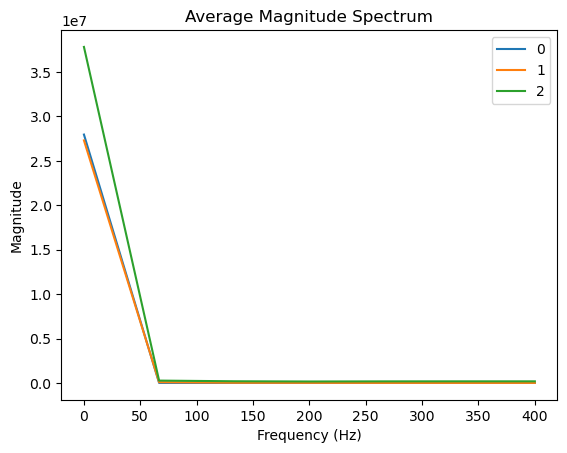

In [40]:
# Initialize an empty array to store the FFT results
fft_results_0 = []
fft_results_1 = []
fft_results_2 = []

fs = 1000  # Sampling frequency in Hz
dt = 1/fs  # Time step in seconds

# Iterate over each row in df_windows_0['IPLA']
for time_series in df_windows_0['IPLA']:
    # Compute the FFT
    fft_result = np.fft.fft(time_series)
    # Append the FFT result to the array
    fft_results_0.append(fft_result)

# Iterate over each row in df_windows_0['IPLA']
for time_series in df_windows_1['IPLA']:
    # Compute the FFT
    fft_result = np.fft.fft(time_series)
    # Append the FFT result to the array
    fft_results_1.append(fft_result)

# Iterate over each row in df_windows_0['IPLA']
for time_series in df_windows_2['IPLA']:
    # Compute the FFT
    fft_result = np.fft.fft(time_series)
    # Append the FFT result to the array
    fft_results_2.append(fft_result)

# Convert the array to a numpy array
fft_results_0 = np.array(fft_results_0)
fft_results_1 = np.array(fft_results_1)
fft_results_2 = np.array(fft_results_2)


# Compute the average FFT over all the rows
average_fft_0 = np.mean(fft_results_0, axis=0)
average_fft_1 = np.mean(fft_results_1, axis=0)
average_fft_2 = np.mean(fft_results_2, axis=0)

# Compute the magnitude spectrum of the average FFT
magnitude_spectrum_0 = np.abs(average_fft_0)
magnitude_spectrum_1 = np.abs(average_fft_1)
magnitude_spectrum_2 = np.abs(average_fft_2)

# Compute the frequency bins
freq_bins = np.fft.fftfreq(len(time_series), d=dt)


# Plot the average magnitude spectrum
plt.plot(freq_bins[:len(time_series)//2], magnitude_spectrum_0[:len(time_series)//2], label='0')
plt.plot(freq_bins[:len(time_series)//2], magnitude_spectrum_1[:len(time_series)//2], label='1')
plt.plot(freq_bins[:len(time_series)//2], magnitude_spectrum_2[:len(time_series)//2], label='2')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Average Magnitude Spectrum')
plt.legend()


We see that there is a significant difference in the low frequencies which might help the model

### Low Frequencies

Plot of the low frequencies obtained from Fast Fourier Transform.

C:\Users\ricca\AppData\Local\Temp\ipykernel_13232\3288563967.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_windows_0_group_mean = df_windows_0_group.mean()
C:\Users\ricca\AppData\Local\Temp\ipykernel_13232\3288563967.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_windows_1_group_mean = df_windows_1_group.mean()
C:\Users\ricca\AppData\Local\Temp\ipykernel_13232\3288563967.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be vali

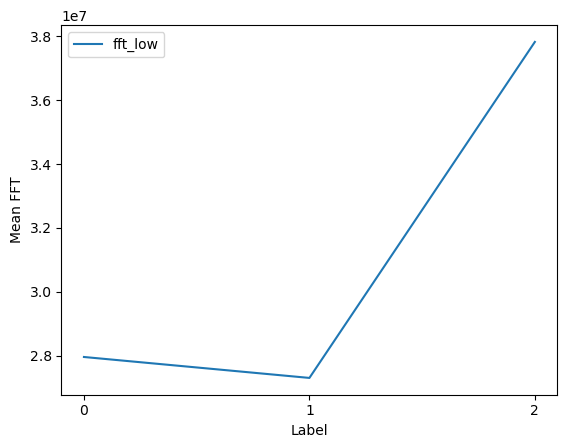

In [41]:
# plot the fft per group of label,
# take the mean of the fft per group of label
df_windows_0_group = df_windows_0.groupby('label')
df_windows_1_group = df_windows_1.groupby('label')
df_windows_2_group = df_windows_2.groupby('label')

df_windows_0_group_mean = df_windows_0_group.mean()
df_windows_1_group_mean = df_windows_1_group.mean()
df_windows_2_group_mean = df_windows_2_group.mean()

y = [df_windows_0_group_mean['fft_low'].to_numpy()[0], df_windows_1_group_mean['fft_low'].to_numpy()[0], df_windows_2_group_mean['fft_low'].to_numpy()[0]]

# plot the data
plt.plot(['0', '1', '2'], y, label='fft_low')
plt.xlabel('Label')
plt.ylabel('Mean FFT')
plt.legend()
plt.show()


We see a significant difference from Frequencies depending on the event type

## IPLA

In [22]:
ipa1  = np.mean(df_windows_0['IPLA'],axis=0)
ipa2 = np.mean(df_windows_1['IPLA'],axis=0)
ipa3 = np.mean(df_windows_2['IPLA'],axis=0)

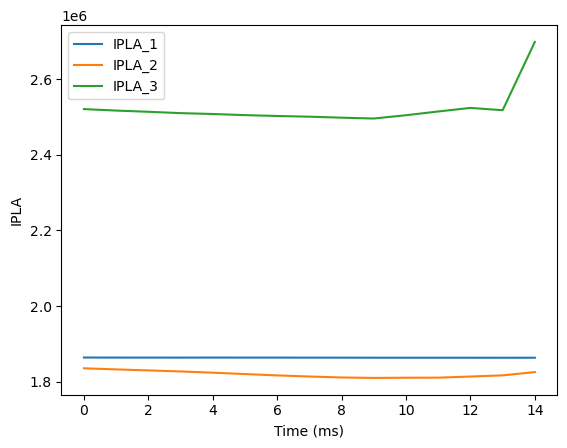

In [24]:
plt.plot(ipa1, label='IPLA_1')
plt.plot(ipa2, label='IPLA_2')
plt.plot(ipa3, label='IPLA_3')
plt.xlabel('Time (ms)')
plt.ylabel('IPLA')
plt.legend()

## ECE

### ECE mean

In [25]:

ece_0  = np.mean(df_windows_0['ECEcore'],axis=0)
ece_1 = np.mean(df_windows_1['ECEcore'],axis=0)
ece_2 = np.mean(df_windows_2['ECEcore'],axis=0)

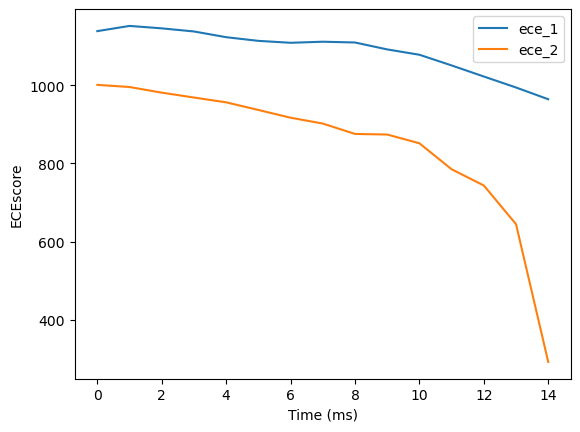

In [26]:
#plot ece_0
#plt.plot(ece_0, label='ece_0') #Plotting the ECEscore for label 0 collapses the scale of the ECE 1 and 2, uncomment the line to see
plt.plot(ece_1, label='ece_1')
plt.plot(ece_2, label='ece_2')
plt.xlabel('Time (ms)')
plt.ylabel('ECEscore')
plt.legend()


### ECE first derivative at the frame 13-14(dx1) and 14-15(dx2)

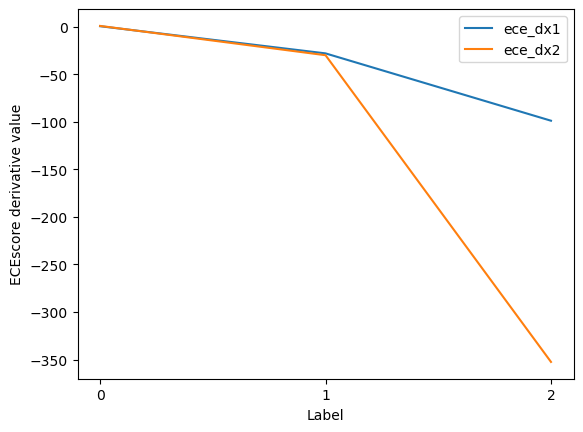

In [30]:
ece_0  = np.mean(df_windows_0['ECEcore_dx1'],axis=0)
ece_1 = np.mean(df_windows_1['ECEcore_dx1'],axis=0)
ece_2 = np.mean(df_windows_2['ECEcore_dx1'],axis=0)

ece_0_dx2 =  np.mean(df_windows_0['ECEcore_dx2'],axis=0)
ece_1_dx2 = np.mean(df_windows_1['ECEcore_dx2'],axis=0)
ece_2_dx2 = np.mean(df_windows_2['ECEcore_dx2'],axis=0)

plt.plot(['0','1','2'],[ece_0, ece_1, ece_2], label='ece_dx1')
plt.plot(['0','1','2'],[ece_0_dx2, ece_1_dx2, ece_2_dx2], label='ece_dx2')
plt.xlabel('Label')
plt.ylabel('ECEscore derivative value')
plt.legend()


## ZMAG

In [31]:
zmag1  = np.mean(df_windows_0['ZMAG'],axis=0)
zmag2 = np.mean(df_windows_1['ZMAG'],axis=0)
zmag3 = np.mean(df_windows_2['ZMAG'],axis=0)


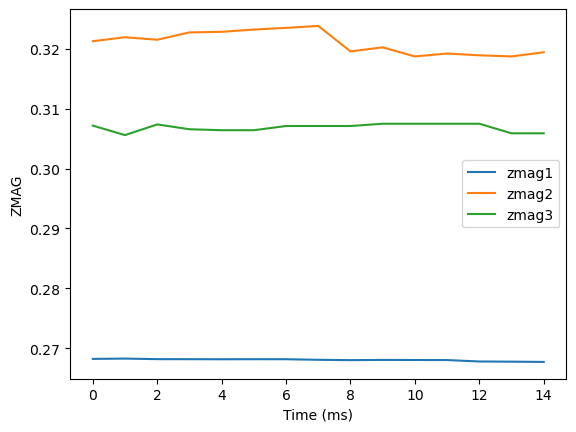

In [33]:
plt.plot(zmag1, label='zmag1')
plt.plot(zmag2, label='zmag2')
plt.plot(zmag3, label='zmag3')
plt.xlabel('Time (ms)')
plt.ylabel('ZMAG')
plt.legend()


## LI

In [34]:
li1  = np.mean(df_windows_0['LI'],axis=0)
li2 = np.mean(df_windows_1['LI'],axis=0)
li3 = np.mean(df_windows_2['LI'],axis=0)


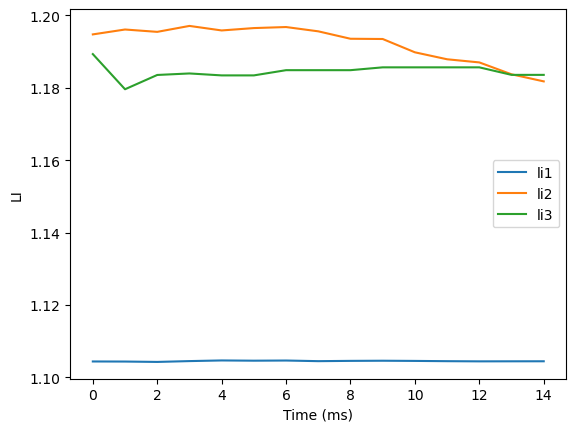

In [36]:
plt.plot(li1, label='li1')
plt.plot(li2, label='li2')
plt.plot(li3, label='li3')
plt.xlabel('Time (ms)')
plt.ylabel('LI')
plt.legend()

## Distance

In [37]:
di1  = np.mean(df_windows_0['distances'],axis=0)
di2 = np.mean(df_windows_1['distances'],axis=0)
di3 = np.mean(df_windows_2['distances'],axis=0)

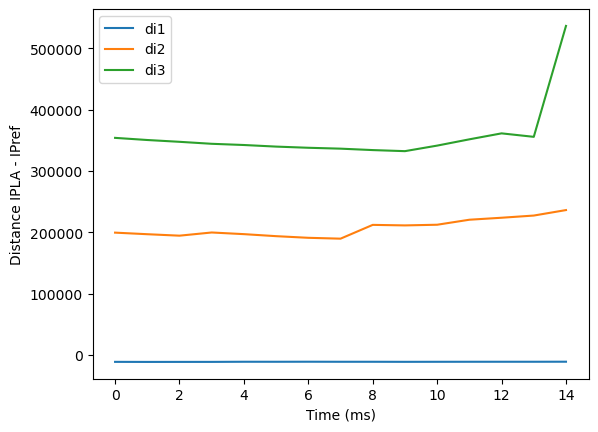

In [39]:
plt.plot(di1, label='di1')
plt.plot(di2, label='di2')
plt.plot(di3, label='di3')
plt.xlabel('Time (ms)')
plt.ylabel('Distance IPLA - IPref')
plt.legend()

# MODELS  

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.svm import SVC


## Data Preparation

### Data Loading

In [2]:
#load df_windows_2
df_windows_2 = pd.read_csv('../data/df_windows_2.csv')
df_windows_2.head(5)
#we take shot 94658

,distances,distance_mean,minor_events,instability_x_current,ECEcore,ECEcore_mean,ECEcore_dx1,ECEcore_dx2,ZMAG,ZMAG_mean,...,IPLA_1,IPLA_2,IPLA_3,IPLA_4,IPLA_mean,time_window,Vloop_1,Vloop_2,Vloop_3,Vloop_4
0,[ 47251.75 38434.25 31351.5 14218.75 ...,-2.542913e+04,2.0,5346022.5,[442.6914 466.4399 467.32544 491.09518 4...,437.04056,-409.736050,-12.706875,[0.28965047 0.24660058 0.24660058 0.24660058 0...,0.249471,...,2645608.2,2672758.2,2663232.5,2687322.8,2673011.2,8.999,8.093350,-8.550330,-4.743373,4.453879
1,[ 47251.75 38434.25 31351.5 14218.75 ...,-2.542913e+04,7.0,18711078.0,[442.6914 466.4399 467.32544 491.09518 4...,437.04056,-409.736050,-12.706875,[0.28965047 0.24660058 0.24660058 0.24660058 0...,0.249471,...,2645608.2,2672758.2,2663232.5,2687322.8,2673011.2,8.999,8.093350,-8.550330,-4.743373,4.453879
2,[-13557.75 -19015.75 -15703.5 -18599. -1608...,-3.049283e+03,8.0,18055596.0,[711.4786 696.3585 692.65765 688.9189 ...,540.03340,14.805653,-34.474680,[0.21888992 0.21282274 0.21282274 0.21282274 0...,0.213227,...,2572907.0,2241136.5,2241272.2,2244817.8,2256949.5,16.837,129.666210,-2.048448,-2.206113,-0.397870
3,[-13557.75 -19015.75 -15703.5 -18599. -1608...,-3.049283e+03,13.0,29340348.0,[711.4786 696.3585 692.65765 688.9189 ...,540.03340,14.805653,-34.474680,[0.21888992 0.21282274 0.21282274 0.21282274 0...,0.213227,...,2572907.0,2241136.5,2241272.2,2244817.8,2256949.5,16.837,129.666210,-2.048448,-2.206113,-0.397870
4,[1167629.25 1164927.5 1162933.5 1162276.6...,1.188487e+06,5.0,5942433.5,[892.6609 855.2241 858.839 858.839 863.1...,781.83746,-197.033600,-228.806060,[0.05448151 0.05448151 0.05448151 0.05448151 0...,0.060592,...,1312420.6,1155192.2,1156463.6,1160106.0,1188486.6,22.959,49.323544,19.165404,-0.235757,0.360215


In [3]:
#load df_windows
df_windows = pd.read_csv('../data/df_windows.csv')
df_windows1 = pd.read_csv('../data/df_windows_1.csv')
df_windows0 = pd.read_csv('../data/df_windows_0.csv')


In [4]:
len(df_windows1)

207

In [5]:
df_windows.shape
len(np.unique(df_windows['shot']))

136

In [6]:
#drop column IPLA, Distances, Shot, window, time_window
#data = df_windows.drop(columns=['IPLA','ECEcore','ZMAG','LI', 'distances', 'window'])
data = df_windows.drop(columns=['IPLA','ECEcore','ZMAG','LI', 'distances', 'window', 'time_window'])
data = data.drop(columns=['instability_x_current'])

#create data_val that takes the 2 shots
#data_val = data[data['shot'] == 81206]
#data_val = data[data['shot'] == 94658]
data_val = data[data['shot'] == 95467]
#take 2 shots out of data
#data = data[data['shot'] != 81206]
#data = data[data['shot'] != 94658]
data = data[data['shot'] != 95467]
data.head(5)


,distance_mean,minor_events,ECEcore_mean,ECEcore_dx1,ECEcore_dx2,ZMAG_mean,LI_mean,fft_low,shot,label,...,IPLA_ddx,IPLA_1,IPLA_2,IPLA_3,IPLA_4,IPLA_mean,Vloop_1,Vloop_2,Vloop_3,Vloop_4
0,-56307.483333,0.0,2822.7430,6.463867,-0.354248,0.342851,1.150685,2.885532e+07,81206,0,...,-2330.6250,1922563.1,1924126.80,1922741.80,1923580.8,1923687.9,-1.036661,-2.111309,-1.613139,-0.717432
1,-47580.700000,0.0,1955.4099,14.115967,-14.139160,0.355247,1.253791,2.927879e+07,81206,0,...,-3192.1250,1951248.2,1952237.00,1952226.20,1950999.0,1951919.2,-3.662136,-1.286469,-1.223850,-1.472519
2,-10166.108333,0.0,1770.3937,11.359497,4.013428,0.303880,1.191489,2.984001e+07,81206,0,...,1529.2500,1988619.6,1987009.50,1989410.00,1989018.2,1989334.0,-0.956687,-0.584253,-1.086478,-0.400202
3,-30771.841667,0.0,1824.6714,16.383667,0.000000,0.256757,1.147373,2.953092e+07,81206,0,...,-56.6250,1969271.8,1968408.60,1969010.90,1967915.2,1968728.4,-0.877379,-0.743979,-0.696189,-1.513505
4,64155.254167,0.0,1735.4666,0.000000,0.000000,0.197556,1.834007,9.361791e+06,81206,0,...,-5759.1875,622110.1,623452.44,624908.25,624267.8,624119.3,1.871721,1.500065,0.527328,0.995674


In [18]:
#merge df_winodws1 and df_windows2
df_windows = df_windows1.append(df_windows_2)

data = df_windows.drop(columns=['IPLA','ECEcore','ZMAG','LI', 'distances', 'window', 'time_window'])
data = data.drop(columns=['instability_x_current'])
np.unique(data['label'])

C:\Users\ricca\AppData\Local\Temp\ipykernel_17680\3534205028.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_windows = df_windows1.append(df_windows_2)


array([1, 2], dtype=int64)

In [19]:
#split data into training and testing, 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(data, data['label'], test_size=0.2, random_state=42)

#drop label column from X_train and X_test
X_train = X_train.drop(columns=['label','shot'])
X_test = X_test.drop(columns=['label','shot'])


## SVM

### Choosing the kernel

In [28]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    clf = make_pipeline(StandardScaler(), SVC(kernel=kernel,class_weight='balanced'))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(kernel)
    print(accuracy_score(y_test, y_pred))
    print(f1_score(y_test, y_pred, average='macro'))
    print(classification_report(y_test, y_pred))



linear
0.96045197740113
0.8847103726986978
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       130
           1       0.91      0.91      0.91        34
           2       0.82      0.69      0.75        13

    accuracy                           0.96       177
   macro avg       0.90      0.87      0.88       177
weighted avg       0.96      0.96      0.96       177

poly
0.9322033898305084
0.8296447622290319
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       130
           1       0.88      0.82      0.85        34
           2       0.88      0.54      0.67        13

    accuracy                           0.93       177
   macro avg       0.90      0.79      0.83       177
weighted avg       0.93      0.93      0.93       177

rbf
0.9378531073446328
0.8374088374088373
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       130
 

We see that Linear has the best results so we decide to go with the linear kernel for hyperparameter tuning. Linear kernel also offers feature importance variables to easily plot which features matter (not avaible for RBF for example).

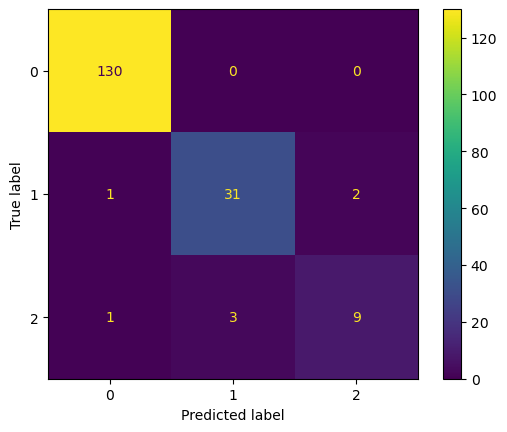

In [260]:
clf = make_pipeline(StandardScaler(), SVC(kernel='linear', class_weight='balanced'))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the ConfusionMatrixDisplay object and plot the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()


### Linear SVM optimization with hyperparameter tuning

In [11]:
#perform an optimized SVM linear with scaler and weight balancing and cross validation
# Create a df X which contains all data columns except for the Label and shot column
X = data.drop(columns=['label','shot'])

# Create a df y which contains only the label column
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a parameter grid
param_grid = {'svc__C': [0.1,1,2,0.5],
              'svc__gamma': [0.0001,0.00001,0.0002]}

# Create a pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='linear', random_state=42))])

# Create a stratified k-fold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a grid search object with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=skf, return_train_score=True)

# Fit the grid search
grid.fit(X_train, y_train)


# View the best parameters and score
print('Best C:', grid.best_estimator_.get_params()['svc__C'])
print('Best gamma:', grid.best_estimator_.get_params()['svc__gamma'])
print('Best kernel:', grid.best_estimator_.get_params()['svc__kernel'])
print('Best score:', grid.best_score_)
print('Best estimator:', grid.best_estimator_)

# View the best estimator
best_svm_model = grid.best_estimator_

# Predict the target value
y_pred = best_svm_model.predict(X_test)

# View the classification report
print(classification_report(y_test, y_pred))
print(f"ACCURACY : {metrics.accuracy_score(y_test, y_pred)}")
print(f"F1 SCORE {metrics.f1_score(y_test, y_pred,average='weighted')}")


Best C: 0.1
Best gamma: 0.0001
Best kernel: linear
Best score: 0.9170731707317072
Best estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(C=0.1, gamma=0.0001, kernel='linear', random_state=42))])
              precision    recall  f1-score   support

           1       0.89      0.98      0.93        42
           2       0.83      0.50      0.62        10

    accuracy                           0.88        52
   macro avg       0.86      0.74      0.78        52
weighted avg       0.88      0.88      0.87        52

ACCURACY : 0.8846153846153846
F1 SCORE 0.8728146853146852


Best C: 1
Best gamma: 0.001

In [20]:
#perform an optimized SVM linear with scaler and weight balancing and cross validation
# Create a df X which contains all data columns except for the Label and shot column
X = data.drop(columns=['label','shot'])

# Create a df y which contains only the label column
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a parameter grid
param_grid = {'svc__C': [0.01,0.1,0.2,0.5],
              'svc__gamma': [0.0001,0.00001,0.0002]}

# Create a pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='linear', random_state=42))])

# Create a stratified k-fold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a grid search object with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=skf, return_train_score=True)

# Fit the grid search
grid.fit(X_train, y_train)


# View the best parameters and score
print('Best C:', grid.best_estimator_.get_params()['svc__C'])
print('Best gamma:', grid.best_estimator_.get_params()['svc__gamma'])
print('Best kernel:', grid.best_estimator_.get_params()['svc__kernel'])
print('Best score:', grid.best_score_)
print('Best estimator:', grid.best_estimator_)

# View the best estimator
best_svm_model = grid.best_estimator_

# Predict the target value
y_pred = best_svm_model.predict(X_test)

# View the classification report
print(classification_report(y_test, y_pred))
print(f"ACCURACY : {metrics.accuracy_score(y_test, y_pred)}")
print(f"F1 SCORE {metrics.f1_score(y_test, y_pred,average='weighted')}")


Best C: 0.2
Best gamma: 0.0001
Best kernel: linear
Best score: 0.921951219512195
Best estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(C=0.2, gamma=0.0001, kernel='linear', random_state=42))])
              precision    recall  f1-score   support

           1       0.89      0.98      0.93        42
           2       0.83      0.50      0.62        10

    accuracy                           0.88        52
   macro avg       0.86      0.74      0.78        52
weighted avg       0.88      0.88      0.87        52

ACCURACY : 0.8846153846153846
F1 SCORE 0.8728146853146852


### Feature analysis

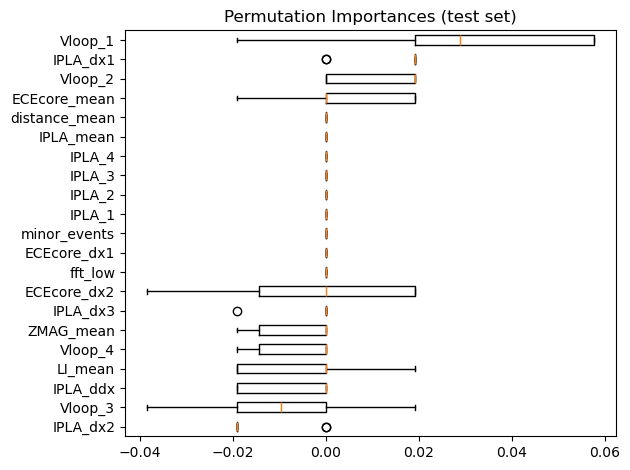

In [21]:
#measure feature importance
result = permutation_importance(best_svm_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

<Axes: >

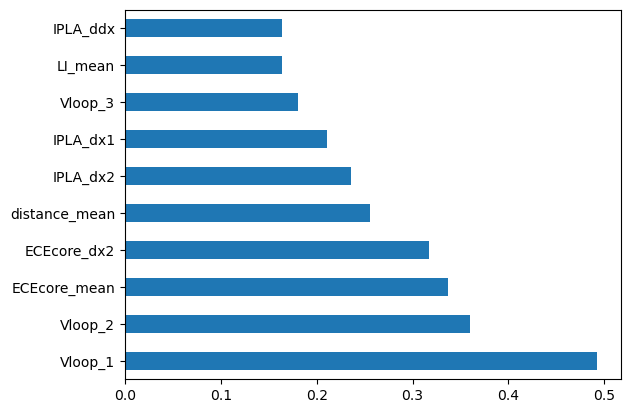

In [22]:
#get svm out of the best_svm_model
svm = best_svm_model['svc']
pd.Series(abs(svm.coef_[0]), index=X.columns).nlargest(10).plot(kind='barh')

### Overfitting analysis

We see that the difference between training accuracy and test accuracy is not enough to justify overfitting. The model seems to be performing well on Train and Test without overfitting

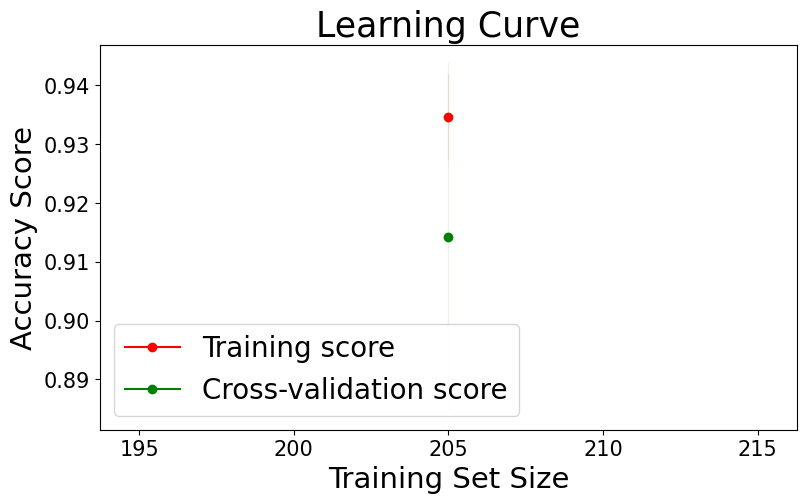

Best training score: 0.9402439024390243
Best cross-validation score: 0.921951219512195


In [23]:
train_sizes, train_scores, test_scores = learning_curve(
    grid.best_estimator_, X, y, cv=skf, n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 5))

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(9, 5))  # Set the figure size

plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std,
                 test_mean + test_std, color="g", alpha=0.1)

# Plot the average training and test score lines at each training set size
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve", fontsize=25)
plt.xlabel("Training Set Size", fontsize=21)
plt.ylabel("Accuracy Score", fontsize=21)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc="best", fontsize=20)

plt.show()
cv_results = grid.cv_results_
mean_train_score = cv_results['mean_train_score'][grid.best_index_]
mean_cv_score = cv_results['mean_test_score'][grid.best_index_]

print('Best training score:', mean_train_score)
print('Best cross-validation score:', mean_cv_score)

### Optimize Poly kernel

In [24]:
#otpimize the polynomial kernel doing a 5 fold cross validation
# Create a df X which contains all data columns except for the Label and shot column
X = data.drop(columns=['label','shot'])

# Create a df y which contains only the label column
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a parameter grid
param_grid = {'svc__C': [1,10,40,100],
              'svc__gamma': [0.5,0.1,0.3,0.005],
              'svc__degree': [2,3,4,5],}
# Create a pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='poly', random_state=42,class_weight='balanced'))])

# Create a stratified k-fold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a grid search object with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=skf, return_train_score=True)

# Fit the grid search
grid.fit(X_train, y_train)


# View the best parameters and score
print('Best C:', grid.best_estimator_.get_params()['svc__C'])
print('Best gamma:', grid.best_estimator_.get_params()['svc__gamma'])
print('Best kernel:', grid.best_estimator_.get_params()['svc__kernel'])
print('Best score:', grid.best_score_)
print('Best estimator:', grid.best_estimator_)

# View the best estimator
best_svm_model = grid.best_estimator_

# Predict the target value
y_pred = best_svm_model.predict(X_test)

# View the classification report
print(classification_report(y_test, y_pred))
print(f"ACCURACY : {metrics.accuracy_score(y_test, y_pred)}")
print(f"F1 SCORE {metrics.f1_score(y_test, y_pred,average='weighted')}")


Best C: 1
Best gamma: 0.1
Best kernel: poly
Best score: 0.9365853658536585
Best estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(C=1, class_weight='balanced', degree=2, gamma=0.1,
                     kernel='poly', random_state=42))])
              precision    recall  f1-score   support

           1       0.98      0.98      0.98        42
           2       0.90      0.90      0.90        10

    accuracy                           0.96        52
   macro avg       0.94      0.94      0.94        52
weighted avg       0.96      0.96      0.96        52

ACCURACY : 0.9615384615384616
F1 SCORE 0.9615384615384616


In [28]:
#otpimize the polynomial kernel doing a 5 fold cross validation
# Create a df X which contains all data columns except for the Label and shot column
X = data.drop(columns=['label','shot'])

# Create a df y which contains only the label column
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a parameter grid
param_grid = {'svc__C': [0.001,0.01,0.02,0.05,1,2,3],
              'svc__gamma': [0.5,0.1,0.3,0.005],
              'svc__degree': [2,3,4,5],}
# Create a pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='poly', random_state=42,class_weight='balanced'))])

# Create a stratified k-fold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a grid search object with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=skf, return_train_score=True)

# Fit the grid search
grid.fit(X_train, y_train)


# View the best parameters and score
print('Best C:', grid.best_estimator_.get_params()['svc__C'])
print('Best gamma:', grid.best_estimator_.get_params()['svc__gamma'])
print('Best kernel:', grid.best_estimator_.get_params()['svc__kernel'])
print('Best score:', grid.best_score_)
print('Best estimator:', grid.best_estimator_)

# View the best estimator
best_svm_model = grid.best_estimator_

# Predict the target value
y_pred = best_svm_model.predict(X_test)

# View the classification report
print(classification_report(y_test, y_pred))
print(f"ACCURACY : {metrics.accuracy_score(y_test, y_pred)}")
print(f"F1 SCORE {metrics.f1_score(y_test, y_pred,average='weighted')}")


Best C: 0.02
Best gamma: 0.5
Best kernel: poly
Best score: 0.9414634146341463
Best estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(C=0.02, class_weight='balanced', degree=2, gamma=0.5,
                     kernel='poly', random_state=42))])
              precision    recall  f1-score   support

           1       0.98      0.98      0.98        42
           2       0.90      0.90      0.90        10

    accuracy                           0.96        52
   macro avg       0.94      0.94      0.94        52
weighted avg       0.96      0.96      0.96        52

ACCURACY : 0.9615384615384616
F1 SCORE 0.9615384615384616


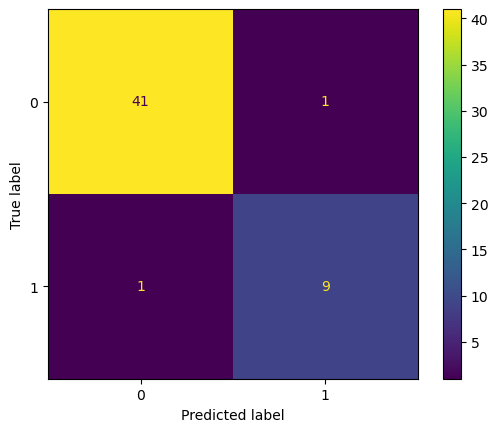

In [29]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the ConfusionMatrixDisplay object and plot the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()


### Optimize RBF kernel

In [264]:
# Create a df X which contains all data columns except for the Label and shot column
X = data.drop(columns=['label','shot'])

# Create a df y which contains only the label column
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a parameter grid
param_grid = {'svc__C': [10,20,30,40,50,80,94,100,110,120],
              'svc__gamma': [0.0002,0.0003,0.0004, 0.0005, 0.0006, 0.0007],}
# Create a pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', random_state=42, class_weight='balanced'))])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a grid search object with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=skf, return_train_score=True)

# Fit the grid search
grid.fit(X_train, y_train)

# View the best parameters and score
print('Best C:', grid.best_estimator_.get_params()['svc__C'])
print('Best gamma:', grid.best_estimator_.get_params()['svc__gamma'])
print('Best kernel:', grid.best_estimator_.get_params()['svc__kernel'])
print('Best score:', grid.best_score_)
print('Best estimator:', grid.best_estimator_)

# View the best estimator
best_svm_model = grid.best_estimator_

# Predict the target value
y_pred = best_svm_model.predict(X_test)

# View the classification report
print(classification_report(y_test, y_pred))
print(f"ACCURACY : {metrics.accuracy_score(y_test, y_pred)}")
print(f"F1 SCORE {metrics.f1_score(y_test, y_pred, average='weighted')}")


Best C: 94
Best gamma: 0.0005
Best kernel: rbf
Best score: 0.9702826890420537
Best estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(C=94, class_weight='balanced', gamma=0.0005,
                     random_state=42))])
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       130
           1       0.89      0.94      0.91        34
           2       1.00      0.77      0.87        13

    accuracy                           0.97       177
   macro avg       0.96      0.90      0.92       177
weighted avg       0.97      0.97      0.97       177

ACCURACY : 0.9661016949152542
F1 SCORE 0.9655130465437177


Best C: 94
Best gamma: 0.0005
Best kernel: rbf
Best score: 0.9702826890420537
Best estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(C=94, class_weight='balanced', gamma=0.0005,
                     random_state=42))])
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       130
           1       0.89      0.94      0.91        34
           2       1.00      0.77      0.87        13

    accuracy                           0.97       177
   macro avg       0.96      0.90      0.92       177
weighted avg       0.97      0.97      0.97       177

ACCURACY : 0.9661016949152542
F1 SCORE 0.9655130465437177

In [27]:
# Create a df X which contains all data columns except for the Label and shot column
X = data.drop(columns=['label','shot'])

# Create a df y which contains only the label column
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a parameter grid
param_grid = {'svc__C': [0.01,0.1,1,2,3,5,10,12,15],
              'svc__gamma': [0.0002,0.0001,0.00001, 0.0005, 0.0006, 0.0007],}
# Create a pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', random_state=42, class_weight='balanced'))])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a grid search object with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=skf, return_train_score=True)

# Fit the grid search
grid.fit(X_train, y_train)

# View the best parameters and score
print('Best C:', grid.best_estimator_.get_params()['svc__C'])
print('Best gamma:', grid.best_estimator_.get_params()['svc__gamma'])
print('Best kernel:', grid.best_estimator_.get_params()['svc__kernel'])
print('Best score:', grid.best_score_)
print('Best estimator:', grid.best_estimator_)

# View the best estimator
best_svm_model = grid.best_estimator_

# Predict the target value
y_pred = best_svm_model.predict(X_test)

# View the classification report
print(classification_report(y_test, y_pred))
print(f"ACCURACY : {metrics.accuracy_score(y_test, y_pred)}")
print(f"F1 SCORE {metrics.f1_score(y_test, y_pred, average='weighted')}")


Best C: 10
Best gamma: 0.0002
Best kernel: rbf
Best score: 0.9365853658536585
Best estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(C=10, class_weight='balanced', gamma=0.0002,
                     random_state=42))])
              precision    recall  f1-score   support

           1       0.89      0.98      0.93        42
           2       0.83      0.50      0.62        10

    accuracy                           0.88        52
   macro avg       0.86      0.74      0.78        52
weighted avg       0.88      0.88      0.87        52

ACCURACY : 0.8846153846153846
F1 SCORE 0.8728146853146852


#### Plot best param

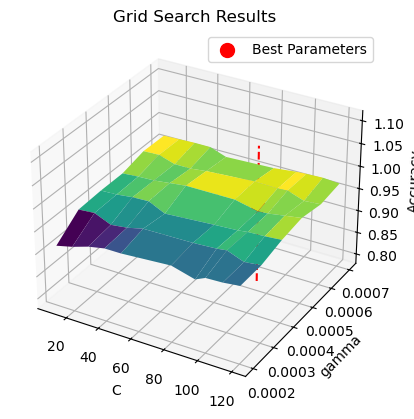

<Figure size 640x480 with 0 Axes>

In [294]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
# Get the grid search results
results = grid.cv_results_
param_grid = grid.param_grid

# Extract the hyperparameters and scores
n_estimators = param_grid['svc__C']
max_depth = param_grid['svc__gamma']
scores = results['mean_test_score']

# Create a meshgrid for the hyperparameters
n_estimators_mesh, max_depth_mesh = np.meshgrid(n_estimators, max_depth)

# Reshape the scores to match the meshgrid shape
scores_mesh = scores.reshape(max_depth_mesh.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(n_estimators_mesh, max_depth_mesh, scores_mesh, cmap='viridis')

# Get the best hyperparameters
best_params = grid.best_params_
best_C = best_params['svc__C']
best_gamma = best_params['svc__gamma']
best_score = grid.best_score_

# Plot the point for the best parameters
ax.scatter(best_C, best_gamma, best_score, color='red', s=100, label='Best Parameters')
ax.plot([best_C, best_C], [best_gamma, best_gamma], [0.8, 1.1], color='red', linestyle='--')

# Set labels and title
ax.set_xlabel('C')
ax.set_ylabel('gamma')
ax.set_zlabel('Accuracy')
ax.set_title('Grid Search Results')
#ax.view_init(elev=30, azim=100)
#ax.view_init(elev=10, azim=90)

# Add a legend
ax.legend()

# Show the plot
plt.show()
plt.savefig('../figures/gridsearch_SVM.png')

#### Feature importance RBF

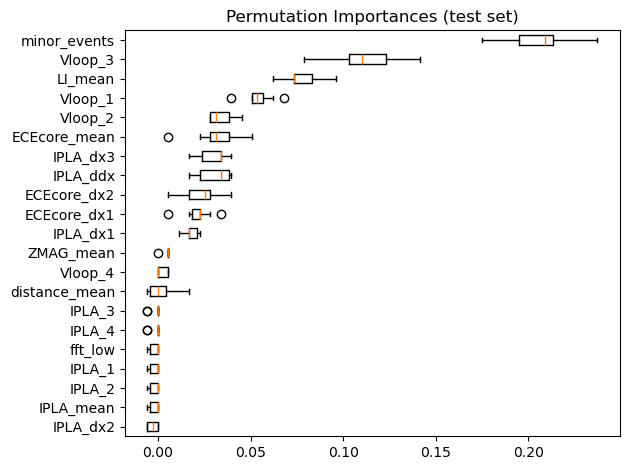

In [249]:
#measure feature importance
result = permutation_importance(best_svm_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

#### Output probabilities of SVM RBF

In [310]:
# Create a df X which contains all data columns except for the Label and shot column
X = data.drop(columns=['label','shot'])

# Create a df y which contains only the label column
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', random_state=42, class_weight='balanced',gamma=0.0005, C=94, probability=True))])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

probabilities = pipe.predict_proba(X_test)
y_test = np.array(y_test)
print(probabilities[100],y_pred[100],y_test[100])

0.9661016949152542
0.9655130465437177
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       130
           1       0.89      0.94      0.91        34
           2       1.00      0.77      0.87        13

    accuracy                           0.97       177
   macro avg       0.96      0.90      0.92       177
weighted avg       0.97      0.97      0.97       177

[0.00723413 0.95363969 0.03912618] 1 1


In [326]:
y_true = y_test == y_pred
false_indices = np.where(y_true == False)[0]

In [327]:
false_indices

array([  3,  36,  51, 117, 129, 162], dtype=int64)

In [346]:
probabilities_rounded = np.round(probabilities,3)

In [334]:
probabilities.shape
proba_0 = probabilities[:,0]
proba_1 = probabilities[:,1]
proba_2 = probabilities[:,2]

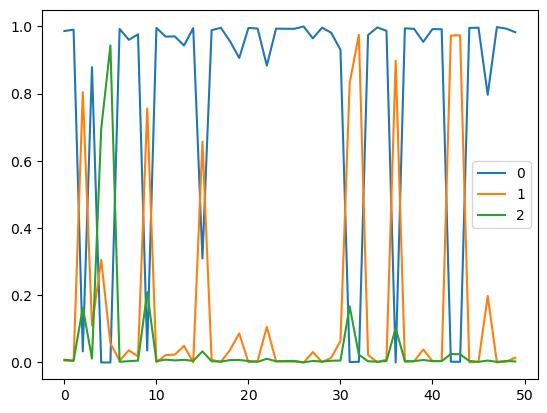

In [335]:
plt.plot(proba_0[:50], label='0')
plt.plot(proba_1[:50], label='1')
plt.plot(proba_2[:50], label = '2')
#plt.plot(y_true[:50], label='True Labels')
#plt.plot(y_pred[:50], label='Predicted Labels')
#plt.plot(y_test, label='Actual Labels')
plt.legend()
#plt.plot(y_pred[:50])
#plt.plot(y_test)

### Test on a validation shot, isolated from the train and test 

In [115]:
X_val = data_val.drop(columns=['label','shot'])
y_val = data_val['label']
y_pred = best_svm_model.predict(X_val)

print(classification_report(y_val, y_pred))
print(f"ACCURACY : {metrics.accuracy_score(y_val, y_pred)}")
print(f"F1 SCORE {metrics.f1_score(y_val, y_pred,average='macro')}")

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.75      0.86         8
           2       1.00      1.00      1.00         2

    accuracy                           0.87        15
   macro avg       0.90      0.92      0.90        15
weighted avg       0.90      0.87      0.87        15

ACCURACY : 0.8666666666666667
F1 SCORE 0.8968253968253967


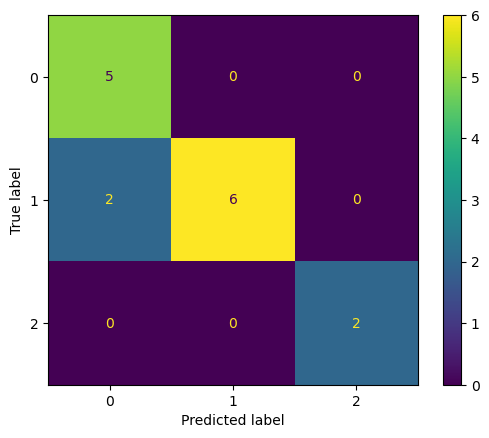

In [116]:
# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Create the ConfusionMatrixDisplay object and plot the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()


## PCA
ca marche pas trop

In [9]:
# Create a df X which contains all data columns except for the Label and shot column
X = data.drop(columns=['label','shot'])
# Create a df y which contains only the label column
y = data['label']

Shape of PCA features: (884, 4)
Explained variance ratio: [0.32276067 0.19222733 0.11044791 0.08616782]


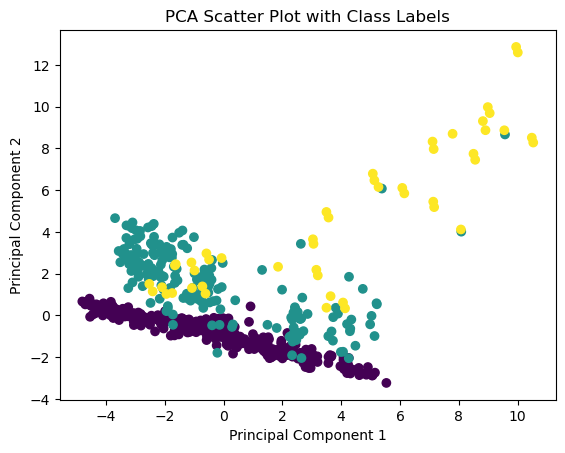

In [16]:
# Create a PCA model with 4 components: pca
pca = PCA(n_components=4)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the PCA instance to the scaled samples
pca.fit(X_scaled)

# Transform the scaled samples: pca_features
pca_features = pca.transform(X_scaled)

# Print the shape of pca_features
print("Shape of PCA features:", pca_features.shape)

# Print the ratio of variance explained by each component
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Plot the PCA results with class labels
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=y)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot with Class Labels")
plt.show()



In [24]:
X_train, X_test, y_train, y_test = train_test_split(pca_features, y, test_size=0.2, random_state=42)

clf = make_pipeline(StandardScaler(), svm.SVC(kernel='linear', C=10, gamma=0.001))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('linear')
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

linear
0.9491525423728814
0.9487849169762332
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       130
           1       0.82      0.94      0.88        34
           2       1.00      0.69      0.82        13

    accuracy                           0.95       177
   macro avg       0.94      0.87      0.89       177
weighted avg       0.95      0.95      0.95       177



In [22]:
pca_features.shape

(884, 4)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = make_pipeline(StandardScaler(), svm.SVC(kernel='linear', C=10, gamma=0.001))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('linear')
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

linear
0.9774011299435028
0.9776801746845105
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       130
           1       0.92      0.97      0.94        34
           2       0.92      0.92      0.92        13

    accuracy                           0.98       177
   macro avg       0.95      0.96      0.95       177
weighted avg       0.98      0.98      0.98       177



In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Create a PCA object and fit it to the data
pca = PCA()
pca.fit(X_scaled)

# Step 3: Get the eigenvalues and eigenvectors
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

# Step 4: Sort eigenvalues
eigenvalue_order = eigenvalues.argsort()[::-1]

# Step 5: Select the number of principal components to keep
n_components = 3 # Adjust as needed

# Step 6: Project data onto selected principal components
data_reduced = pca.transform(X_scaled)[:, :n_components]

# Step 7: Interpret principal components
component_loadings = eigenvectors[eigenvalue_order][:n_components]

# You can also use pca.explained_variance_ratio_ to see the variance explained by each component
# Get the indices of the top variables for each component
top_variables_indices = np.argsort(np.abs(component_loadings), axis=1)[:, ::-1]

# Print the top k important variables for each component (adjust k as needed)
k = 5  # You can change this to show more or fewer variables
variable_names = X.columns
for component_idx in range(n_components):
    print(f"Top {k} Variables for Principal Component {component_idx + 1}:")
    for i in range(k):
        variable_idx = top_variables_indices[component_idx, i]
        loading_value = component_loadings[component_idx, variable_idx]
        variable_name = variable_names[variable_idx]  # Replace with your actual variable names
        print(f"Variable: {variable_name}, Loading: {loading_value:.4f}")
    print()

Top 5 Variables for Principal Component 1:
Variable: IPLA_1, Loading: 0.3716
Variable: fft_low, Loading: 0.3669
Variable: IPLA_mean, Loading: 0.3669
Variable: IPLA_4, Loading: 0.3667
Variable: IPLA_2, Loading: 0.3666

Top 5 Variables for Principal Component 2:
Variable: ECEcore_mean, Loading: -0.3540
Variable: IPLA_dx3, Loading: 0.3525
Variable: Vloop_1, Loading: 0.3419
Variable: IPLA_ddx, Loading: 0.3392
Variable: minor_events, Loading: 0.3046

Top 5 Variables for Principal Component 3:
Variable: IPLA_dx2, Loading: 0.3825
Variable: Vloop_3, Loading: -0.3421
Variable: Vloop_4, Loading: -0.3385
Variable: ZMAG_mean, Loading: 0.3153
Variable: IPLA_dx1, Loading: 0.3116



## Random Forest


In [30]:
# Create a df X which contains all data columns except for the Label and shot column
X = data.drop(columns=['label','shot'])
# Create a df y which contains only the label column
y = data['label']

### Trial run

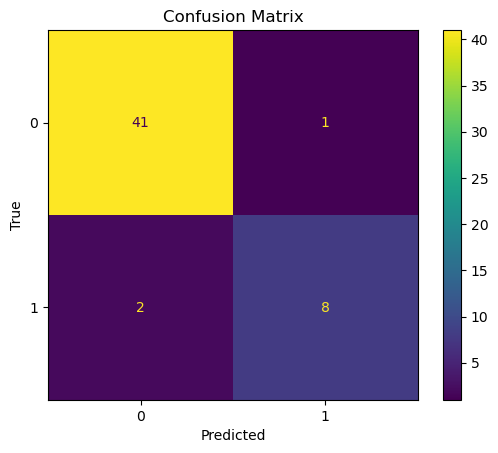

Accuracy: 0.9423076923076923
F1 score: 0.9411288402000475


In [31]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)

# Fit the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the ConfusionMatrixDisplay object and plot the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

# Set the title and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Show the plot
plt.show()
# Calculate accuracy to evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"F1 score: {f1_score(y_test, y_pred, average='weighted')}")

The model performs even better than Linear SVM without hyperparameter tuning, we thus investigate further.

### RF hyperparameter tuning

In [34]:
# Split the dataset into training and testing sets (we'll use Stratified K-Fold for cross-validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100,500,1000],  # Number of trees in the forest
    'max_depth': [10,50],  # Maximum depth of the trees
    'min_samples_split': [ 2,5,10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1,3,5]  # Minimum number of samples required to be at a leaf node
    #'n_estimators': [500],  # Number of trees in the forest
    #'max_depth': [10],  # Maximum depth of the trees
    #'min_samples_split': [ 2],  # Minimum samples required to split an internal node
    #'min_samples_leaf': [1]  # Minimum number of samples required to be at a leaf node
}

# Create a Stratified K-Fold cross-validator (you can adjust the number of folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='accuracy', cv=cv)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and estimator
best_rf_classifier = grid_search.best_estimator_
best_params = grid_search.best_params_

# Fit the best classifier on the entire training data
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Calculate accuracy to evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"F1 score: {f1_score(y_test, y_pred, average='weighted')}")
print("Best Hyperparameters:", best_params)


Accuracy: 0.9423076923076923
F1 score: 0.9411288402000475
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [364]:
# Split the dataset into training and testing sets (we'll use Stratified K-Fold for cross-validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42, min_samples_leaf=1, min_samples_split=2)

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10,50,100,200,400,500,600,800,1000],  # Number of trees in the forest
    'max_depth': [2,6,10,14,18],  # Maximum depth of the trees
    #'min_samples_split': [ 2,5,10],  # Minimum samples required to split an internal node
    #'min_samples_leaf': [1,3,5]  # Minimum number of samples required to be at a leaf node
    #'n_estimators': [500],  # Number of trees in the forest
    #'max_depth': [10],  # Maximum depth of the trees
    #'min_samples_split': [ 2],  # Minimum samples required to split an internal node
    #'min_samples_leaf': [1]  # Minimum number of samples required to be at a leaf node
}

# Create a Stratified K-Fold cross-validator (you can adjust the number of folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='accuracy', cv=cv)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and estimator
best_rf_classifier = grid_search.best_estimator_
best_params = grid_search.best_params_

# Fit the best classifier on the entire training data
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Calculate accuracy to evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"F1 score: {f1_score(y_test, y_pred, average='weighted')}")
print("Best Hyperparameters:", best_params)


Accuracy: 0.9661016949152542
F1 score: 0.9636912106228294
Best Hyperparameters: {'max_depth': 10, 'n_estimators': 200}


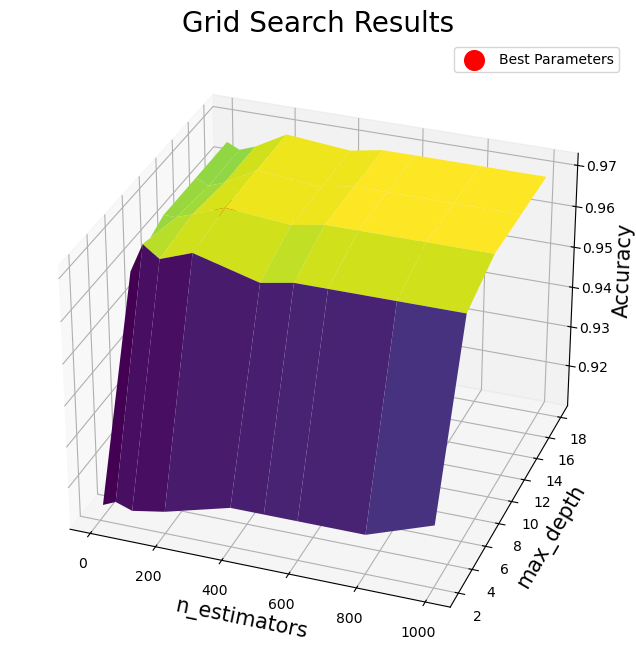

In [379]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
# Get the grid search results
results = grid_search.cv_results_
param_grid = grid_search.param_grid

# Extract the hyperparameters and scores
n_estimators = param_grid['n_estimators']
max_depth = param_grid['max_depth']
scores = results['mean_test_score']

# Create a meshgrid for the hyperparameters
n_estimators_mesh, max_depth_mesh = np.meshgrid(n_estimators, max_depth)

# Reshape the scores to match the meshgrid shape
scores_mesh = scores.reshape(max_depth_mesh.shape)
# Create a 3D plot with a larger figure size
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(n_estimators_mesh, max_depth_mesh, scores_mesh, cmap='viridis')

# Get the best hyperparameters
best_params = grid_search.best_params_
best_n_estimators = best_params['n_estimators']
best_max_depth = best_params['max_depth']
best_score = grid_search.best_score_

# Plot the point for the best parameters
ax.scatter(best_n_estimators, best_max_depth, best_score, color='red', s=200, label='Best Parameters')

# Set labels and title with increased fontsize
ax.set_xlabel('n_estimators', fontsize=15)
ax.set_ylabel('max_depth', fontsize=15)
ax.set_zlabel('Accuracy', fontsize=15)
ax.set_title('Grid Search Results', fontsize=20)

# Increase fontsize of tick labels
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.tick_params(axis='z', labelsize=10)
ax.view_init(azim=290)

# Add a legend
ax.legend()

# Show the plot
plt.show()
#plt.savefig('../figures/gridsearch_RF.png')

Accuracy: 0.9943502824858758

Best Hyperparameters: 
- 'max_depth': 10
- 'min_samples_leaf': 1
- 'min_samples_split': 5
- 'n_estimators': 1000

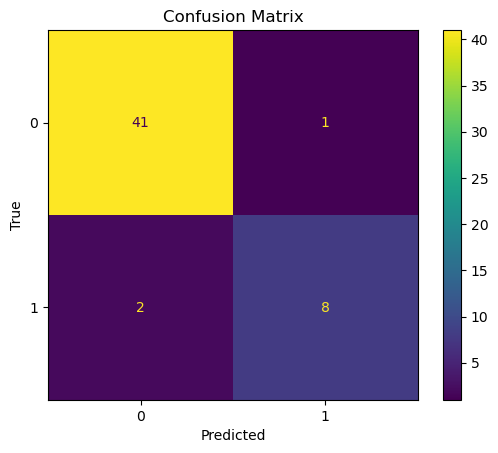

              precision    recall  f1-score   support

           1       0.95      0.98      0.96        42
           2       0.89      0.80      0.84        10

    accuracy                           0.94        52
   macro avg       0.92      0.89      0.90        52
weighted avg       0.94      0.94      0.94        52

ACCURACY : 0.9423076923076923
F1 SCORE 0.9411288402000475


In [32]:
#using the Best Hyperparameters for RF
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42,max_depth=10,min_samples_leaf=1,min_samples_split=2)

# Fit the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the ConfusionMatrixDisplay object and plot the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

# Set the title and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Show the plot
plt.show()

print(classification_report(y_test, y_pred))
print(f"ACCURACY : {metrics.accuracy_score(y_test, y_pred)}")
print(f"F1 SCORE {metrics.f1_score(y_test, y_pred,average='weighted')}")


### Feature importance

Feature ranking:
1. Vloop_1 (0.22364851712611225)
2. IPLA_dx3 (0.1337965557253023)
3. IPLA_ddx (0.10681556192051897)
4. ECEcore_dx2 (0.0739459397833259)
5. Vloop_2 (0.06663958844818858)
6. IPLA_dx1 (0.06104165678407989)
7. minor_events (0.060395591752945274)
8. IPLA_dx2 (0.053779595895302235)
9. LI_mean (0.03534012387638985)
10. IPLA_1 (0.026281866515279646)
11. fft_low (0.02014517029457921)
12. IPLA_mean (0.019491036875033372)
13. IPLA_3 (0.015403407652083274)
14. ECEcore_dx1 (0.01521177361300788)
15. IPLA_4 (0.013911744599404342)
16. Vloop_3 (0.013785442799111054)
17. distance_mean (0.013685731196528309)
18. ECEcore_mean (0.013122883739255811)
19. IPLA_2 (0.012865102290911508)
20. ZMAG_mean (0.012307531836703448)
21. Vloop_4 (0.008385177275936791)


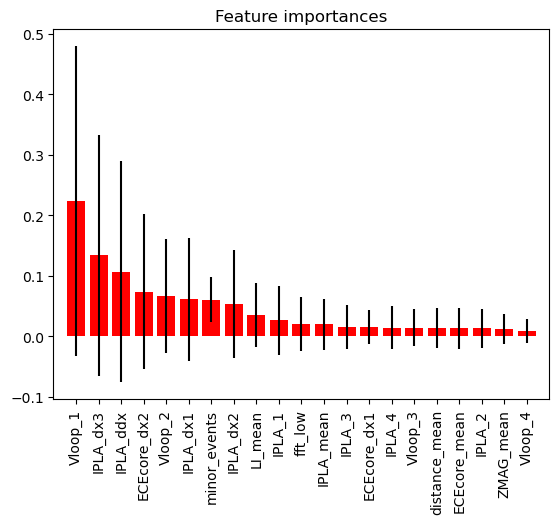

In [33]:
#plot the importance of the features
importances = rf_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_classifier.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f+1}. {X.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color='r', yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [124]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    rf_classifier, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=X.columns)

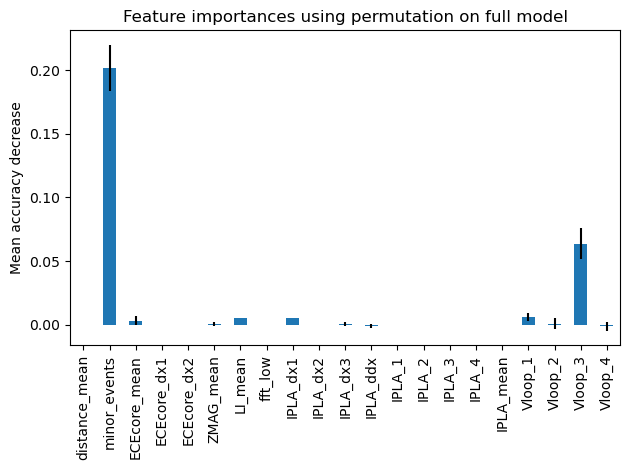

In [125]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

### Validation Shot

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.88      0.93         8
           2       1.00      1.00      1.00         2

    accuracy                           0.93        15
   macro avg       0.94      0.96      0.95        15
weighted avg       0.94      0.93      0.93        15

ACCURACY : 0.9333333333333333
F1 SCORE 0.9474747474747475


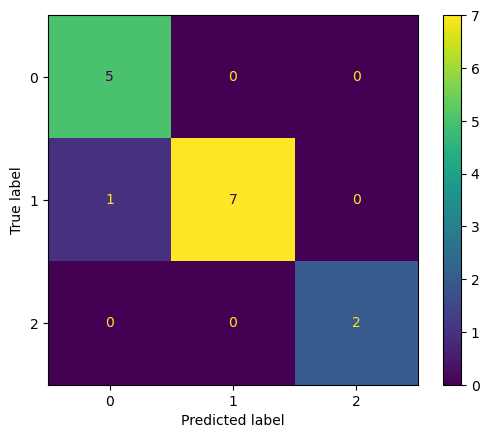

In [126]:
X_val = data_val.drop(columns=['label','shot'])
y_val = data_val['label']
y_pred = best_rf_classifier.predict(X_val)

print(classification_report(y_val, y_pred))
print(f"ACCURACY : {metrics.accuracy_score(y_val, y_pred)}")
print(f"F1 SCORE {metrics.f1_score(y_val, y_pred,average='macro')}")
# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Create the ConfusionMatrixDisplay object and plot the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()


# TEST MOVING WINDOWS

In [21]:
import process_data
from importlib import reload
reload(process_data)

<module 'process_data' from 'c:\\Users\\ricca\\OneDrive\\Documenti\\GitHub\\ml_tokamak\\code\\process_data.py'>

In [17]:
df_data_raw.shape[0]

17980

In [18]:
df_data_raw.head(4)

,IPLA,IPref,ECEcore,SSXcore,LI,Q95,ZMAG,Vloop,Frame,Label,Time,Distance,Shot
0,1989456.750,1999500.0,1740.929077,0.008850,1.191489,3.874169,0.30388,-0.519496,0,0,10.361,-10043.250,81206
1,1989606.250,1999500.0,1744.737427,0.008850,1.191489,3.874169,0.30388,-0.758418,1,0,10.362,-9893.750,81206
2,1988484.000,1999500.0,1756.823730,0.008698,1.191489,3.874169,0.30388,-1.037327,2,0,10.363,-11016.000,81206
3,1989329.625,1999500.0,1756.823730,0.008469,1.191489,3.874169,0.30388,-0.758418,3,0,10.364,-10170.375,81206


In [78]:
#take windows of 15 consecutive rows of df_data_raw
windows = []
y_w = []
for i in range(0, df_data_raw.shape[0]-15):
    df_data_sliced = df_data_raw.iloc[i:i+15]
    y_w.append(df_data_sliced['Label'].iloc[0])
    windows.append(process_data.data_to_window(df_data_sliced))


In [79]:
windows[0]

,distance_mean,ECEcore_mean,ECEcore_dx1,ECEcore_dx2,ZMAG_mean,LI_mean,IPLA_dx1,IPLA_dx2,IPLA_dx3,IPLA_ddx,fft_low,IPLA_1,IPLA_2,IPLA_3,IPLA_4,IPLA_mean,time_window,Vloop_1,Vloop_2,Vloop_3,Vloop_4
0,-10043.091667,1759.663696,0.0,-3.093018,0.30388,1.191489,2400.5,885.25,-431.25,-1316.5,2.984185e+07,1989864.0,1989445.625,1990167.375,1988951.375,1989456.875,10.361,-0.478177,-1.209271,-0.808485,-1.037327


In [80]:
# Create a df X which contains all data columns except for the Label and shot column
X = data.drop(columns=['label','shot','minor_events'])
# Create a df y which contains only the label column
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.columns


Index(['distance_mean', 'ECEcore_mean', 'ECEcore_dx1', 'ECEcore_dx2',
       'ZMAG_mean', 'LI_mean', 'fft_low', 'IPLA_dx1', 'IPLA_dx2', 'IPLA_dx3',
       'IPLA_ddx', 'IPLA_1', 'IPLA_2', 'IPLA_3', 'IPLA_4', 'IPLA_mean',
       'Vloop_1', 'Vloop_2', 'Vloop_3', 'Vloop_4'],
      dtype='object')

In [81]:
#change all 2 to 1 in y_train and y_test
y_train = pd.Series(y_train).replace(2, 1)
y_test = pd.Series(y_test).replace(2, 1)
y_w = pd.Series(y_w).replace(2, 1)


In [84]:
clf = make_pipeline(StandardScaler(), SVC(kernel='rbf',class_weight='balanced', C=94,gamma=0.0005, probability=True))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

0.9548022598870056
0.9544834905616153
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       130
           1       0.93      0.89      0.91        47

    accuracy                           0.95       177
   macro avg       0.95      0.94      0.94       177
weighted avg       0.95      0.95      0.95       177



In [37]:
clf = make_pipeline(StandardScaler(), SVC(kernel='rbf',class_weight='balanced', C=94,gamma=0.0005,probability=True))
#fit x and y to get the most data
clf.fit(X,y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=94, class_weight='balanced', gamma=0.0005,
                     probability=True))])

In [86]:
#predit the label of each window
labels = []
probas = np.zeros((len(windows), 2))
N = len(windows)
for i in range(N):
    w = windows[i].copy()
    w.drop('time_window', axis=1, inplace=True)
    w = w[X_train.columns]

    labels.append(clf.predict(w))
    probas[i] = clf.predict_proba(w)


In [54]:
probas[:,0]

array([0.85576922, 0.87343557, 0.86004223, ..., 0.9793648 , 0.96733635,
       0.96061197])

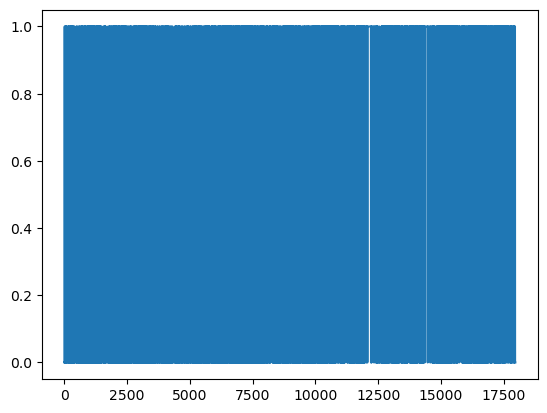

In [87]:
plt.plot(labels)
#plt.plot(y_w)

In [88]:
#calculate f1 score between the predicted labels and the real labels
print(f1_score(y_w, labels, average='weighted'))

0.8417031848842386


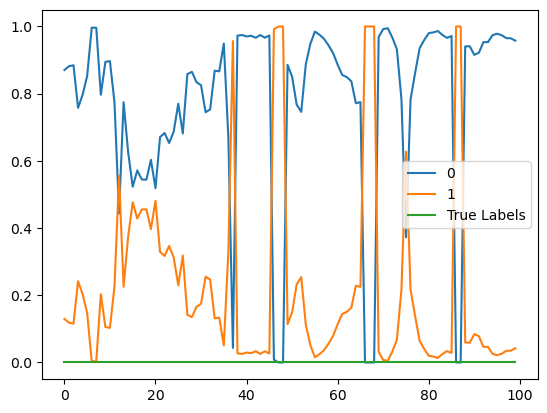

In [90]:
plt.plot(probas[:100,0], label='0')
plt.plot(probas[:100,1], label='1')
#plt.plot(probas[:100,2], label = '2')
plt.plot(y_w[:100], label='True Labels')
plt.legend()

In [91]:
probas.shape

(17965, 2)

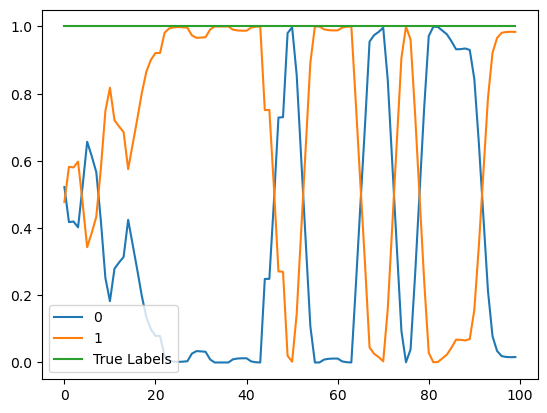

In [118]:
from scipy.ndimage import convolve1d
mov_mean_length = 4
mov_mean_weights = np.ones(mov_mean_length) / mov_mean_length

smoothed = convolve1d(probas, mov_mean_weights, axis=0)
plt.plot(smoothed[10000:10100,0],label = '0')
plt.plot(smoothed[10000:10100,1],label = '1')
plt.plot( y_w.values[10000:10100], label='True Labels')
plt.legend(loc = 'lower left')

In [100]:
smoothed[10000:10500]

array([[5.22102401e-01, 4.77897599e-01],
       [4.17671550e-01, 5.82328450e-01],
       [4.19546139e-01, 5.80453861e-01],
       [4.02243312e-01, 5.97756688e-01],
       [5.24663370e-01, 4.75336630e-01],
       [6.56875700e-01, 3.43124300e-01],
       [6.14357612e-01, 3.85642388e-01],
       [5.66564641e-01, 4.33435359e-01],
       [4.23427123e-01, 5.76572877e-01],
       [2.51696133e-01, 7.48303867e-01],
       [1.82416704e-01, 8.17583296e-01],
       [2.79311497e-01, 7.20688503e-01],
       [2.97561496e-01, 7.02438504e-01],
       [3.14059197e-01, 6.85940803e-01],
       [4.24484681e-01, 5.75515319e-01],
       [3.50205929e-01, 6.49794071e-01],
       [2.75684989e-01, 7.24315011e-01],
       [1.97813400e-01, 8.02186600e-01],
       [1.34402720e-01, 8.65597280e-01],
       [9.89584680e-02, 9.01041532e-01],
       [7.89956266e-02, 9.21004373e-01],
       [7.89539740e-02, 9.21046026e-01],
       [1.87368479e-02, 9.81263152e-01],
       [5.66824207e-03, 9.94331758e-01],
       [2.699217

In [121]:
#write the following algorithm : for every 15 windows, find the maximum value of the probability of being in class 1, if it is higher than 0.95, assign to the maximum value index a label True, else assign a label False

#find the maximum value of the probability of being in class 1
max_proba =[]
for i in range(0,len(smoothed)-15):
    if np.max(smoothed[i:i+15,1]) > 0.95:
        max_proba.append(i+np.argmax(smoothed[i:i+15,1]))

In [122]:
max_proba

[6517,
 6518,
 6519,
 6520,
 6521,
 6522,
 6522,
 6522,
 6522,
 6522,
 6522,
 6522,
 6522,
 6522,
 6522,
 6522,
 6522,
 6522,
 6522,
 6522,
 6523,
 6524,
 6545,
 6546,
 6546,
 6548,
 6549,
 6549,
 6549,
 6549,
 6549,
 6549,
 6549,
 6549,
 6549,
 6549,
 6549,
 6549,
 6549,
 6549,
 6549,
 6565,
 6566,
 6566,
 6566,
 6566,
 6566,
 6566,
 6566,
 6566,
 6566,
 6566,
 6566,
 6566,
 6566,
 6566,
 6566,
 6567,
 6568,
 6569,
 7306,
 7306,
 7306,
 7306,
 7306,
 7306,
 7306,
 7306,
 7306,
 7306,
 7306,
 7306,
 7306,
 7306,
 7306,
 8164,
 8164,
 8164,
 8164,
 8164,
 8164,
 8164,
 8164,
 8164,
 8164,
 8164,
 8164,
 8164,
 8164,
 8164,
 8165,
 8166,
 8167,
 8182,
 8183,
 8183,
 8183,
 8183,
 8183,
 8183,
 8183,
 8183,
 8183,
 8183,
 8183,
 8183,
 8183,
 8183,
 8183,
 8184,
 8199,
 8200,
 8201,
 8201,
 8201,
 8201,
 8201,
 8201,
 8201,
 8201,
 8201,
 8201,
 8201,
 8201,
 8201,
 8201,
 8201,
 8202,
 8203,
 8218,
 8219,
 8220,
 8221,
 8221,
 8221,
 8221,
 8225,
 8226,
 8227,
 8228,
 8228,
 8228,
 8228,